## WetherPy
---

#### Analysis

* Observer Trend 1
        Maximun temperture is almost at 100F from Lat = 0 to 30 degrees near to Equator.
    
* Observer Trend 2
        High concentration of humidity from the equator up to the north
    
* Observer Trend 3
         More presence of highs on wind speed at the south of the equator.


In [172]:
# pip install citipy

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from secure.api import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [53]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

## Perform API Calls

In [54]:
def getjsonRow(cityJSON):
    return {
        "City": cityJSON["name"],
        "Cloudyness": cityJSON["clouds"]["all"],
        "Country": cityJSON["sys"]["country"],
        "Date": cityJSON["dt"],
        "Humidity": cityJSON["main"]["humidity"],
        "Lat": cityJSON["coord"]["lat"], 
        "Lng": cityJSON["coord"]["lon"],
        "Max Temp": cityJSON["main"]["temp_max"],
        "Wind Speed": cityJSON["wind"]["speed"]
    }


In [65]:
# OpenWeatherMap API Key
api_key = api_keys

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

i = 1
j = 1
city_dic = []

print('Begining Data Retrival')
print('----------------------')

for city in cities:

    print(f'Processing Record {i} of set {j} | {city}')
    print(url + '&q={}'.format(city))
    
    response = requests.get(url + '&q={}'.format(city))
    
    if response.json()["cod"] == 200:
        city_dic.append(getjsonRow(response.json()))

    i = i + 1

    if i >= 51:
        i = 0
        j = j + 1
        time.sleep(20)

print('----------------------')
print('Data Retrival Complete')
print('----------------------')

Begining Data Retrival
----------------------
Processing Record 1 of set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=barrow
Processing Record 2 of set 1 | layou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=layou
Processing Record 3 of set 1 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=chuy
Processing Record 4 of set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=rikitea
Processing Record 5 of set 1 | batemans bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=batemans bay
Processing Record 6 of set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=hermanus
Processing Record 7 of set 1 | severo-kurilsk
http://a

Processing Record 5 of set 2 | cockburn town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=cockburn town
Processing Record 6 of set 2 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=amderma
Processing Record 7 of set 2 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=saldanha
Processing Record 8 of set 2 | bitkine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=bitkine
Processing Record 9 of set 2 | haicheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=haicheng
Processing Record 10 of set 2 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=qaanaaq
Processing Record 11 of set 2 | mackay
http://api.openweathermap.org/data/2.5/weath

Processing Record 9 of set 3 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=bengkulu
Processing Record 10 of set 3 | orchard homes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=orchard homes
Processing Record 11 of set 3 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=codrington
Processing Record 12 of set 3 | berbera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=berbera
Processing Record 13 of set 3 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=meulaboh
Processing Record 14 of set 3 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=castro
Processing Record 15 of set 3 | tuktoyaktuk
http://api.openweathermap.org/d

Processing Record 13 of set 4 | kidal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=kidal
Processing Record 14 of set 4 | bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=bud
Processing Record 15 of set 4 | mocambique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=mocambique
Processing Record 16 of set 4 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=sitka
Processing Record 17 of set 4 | chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=chapais
Processing Record 18 of set 4 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=vila velha
Processing Record 19 of set 4 | custoias
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing Record 17 of set 5 | mrirt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=mrirt
Processing Record 18 of set 5 | alyangula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=alyangula
Processing Record 19 of set 5 | gboko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=gboko
Processing Record 20 of set 5 | itoman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=itoman
Processing Record 21 of set 5 | taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=taltal
Processing Record 22 of set 5 | fare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=fare
Processing Record 23 of set 5 | nuevo progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 21 of set 6 | urdzhar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=urdzhar
Processing Record 22 of set 6 | hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=hofn
Processing Record 23 of set 6 | longlac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=longlac
Processing Record 24 of set 6 | moron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=moron
Processing Record 25 of set 6 | samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=samarai
Processing Record 26 of set 6 | narasannapeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=narasannapeta
Processing Record 27 of set 6 | zhigansk
http://api.openweathermap.org/data/2.5/weather?unit

Processing Record 26 of set 7 | kuytun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=kuytun
Processing Record 27 of set 7 | inhambane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=inhambane
Processing Record 28 of set 7 | papayal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=papayal
Processing Record 29 of set 7 | pacific grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=pacific grove
Processing Record 30 of set 7 | ransang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=ransang
Processing Record 31 of set 7 | shieli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=shieli
Processing Record 32 of set 7 | haverfordwest
http://api.openweathermap.org/data/2

Processing Record 30 of set 8 | naftah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=naftah
Processing Record 31 of set 8 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=lebu
Processing Record 32 of set 8 | salekhard
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=salekhard
Processing Record 33 of set 8 | capinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=capinopolis
Processing Record 34 of set 8 | tondi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=tondi
Processing Record 35 of set 8 | derzhavinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=derzhavinsk
Processing Record 36 of set 8 | lagoa
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 35 of set 9 | usinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=usinsk
Processing Record 36 of set 9 | aflu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=aflu
Processing Record 37 of set 9 | bridlington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=bridlington
Processing Record 38 of set 9 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=kruisfontein
Processing Record 39 of set 9 | floro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=floro
Processing Record 40 of set 9 | husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=husavik
Processing Record 41 of set 9 | ippy
http://api.openweathermap.org/data/2.5/weather?unit

Processing Record 39 of set 10 | bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=bilma
Processing Record 40 of set 10 | tabiauea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=tabiauea
Processing Record 41 of set 10 | dakar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=dakar
Processing Record 42 of set 10 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=umzimvubu
Processing Record 43 of set 10 | necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=necochea
Processing Record 44 of set 10 | werota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=werota
Processing Record 45 of set 10 | kabalo
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 44 of set 11 | nexo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=nexo
Processing Record 45 of set 11 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=tsihombe
Processing Record 46 of set 11 | hinton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=hinton
Processing Record 47 of set 11 | portobelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=portobelo
Processing Record 48 of set 11 | andenes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=andenes
Processing Record 49 of set 11 | pokaran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=pokaran
Processing Record 0 of set 12 | coihaique
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 48 of set 12 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=yar-sale
Processing Record 49 of set 12 | gavrilovka vtoraya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=gavrilovka vtoraya
Processing Record 0 of set 13 | vilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=vilyuysk
Processing Record 1 of set 13 | pontes e lacerda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=pontes e lacerda
Processing Record 2 of set 13 | uwayl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=uwayl
Processing Record 3 of set 13 | iquitos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e4c4a7418202ae1808edaff758ac1d7d&q=iquitos
Processing Record 4 of set 13 | northam
http://api.o

In [170]:
city_data = pd.DataFrame(city_dic, index= np.arange(len(city_dic)))

city_data.to_csv('./output_data/city_data.csv')

city_data.count()

City          555
Cloudyness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [171]:
#Display the City Data Frame
city_data.head()

#Set new column with clear date.
city_data["Visual Date"] = pd.to_datetime(city_data['Date'],unit='s')

#Set report date.
report_date = "{0:%d}/{0:%m}/{0:%Y}".format(city_data.loc[1:1,"Visual Date"][1])

## Latitude vs Temperture Plot

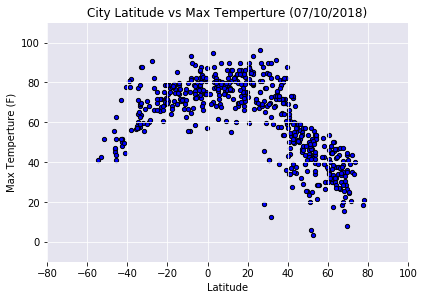

In [166]:
fig, ax = plt.subplots()
ax.scatter(city_data["Lat"], city_data["Max Temp"], c="b", edgecolors="k", s = 18)

ax.set_title(f'City Latitude vs Max Temperture ({report_date})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperture (F)')

ax.set_xlim(left=-80, right=100)
ax.set_ylim(bottom=-10, top=110)

ax.set_facecolor('#E5E4EF')
ax.grid(color="w")
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.figure.set_size_inches(w=6.47, h=4.4)

fig.savefig('./images/LatMaxTemperture.png')
fig.show(warn=False)

## Latitude vs Humidity Plot

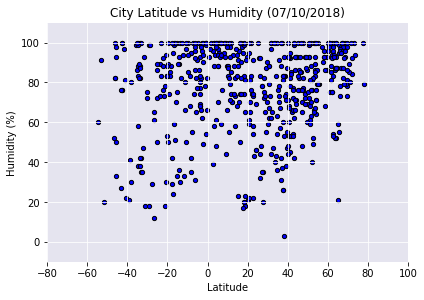

In [167]:
fig, ax = plt.subplots()
ax.scatter(city_data["Lat"], city_data["Humidity"], c="b", edgecolors="k", s = 18)

ax.set_title(f'City Latitude vs Humidity ({report_date})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')

ax.set_xlim(left=-80, right=100)
ax.set_ylim(bottom=-10, top=110)

ax.set_facecolor('#E5E4EF')
ax.grid(color="w")
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.figure.set_size_inches(w=6.47, h=4.4)
fig.savefig('./images/LatHumidity.png')
fig.show(warn=False)

## Latitude vs. Cloudiness Plot

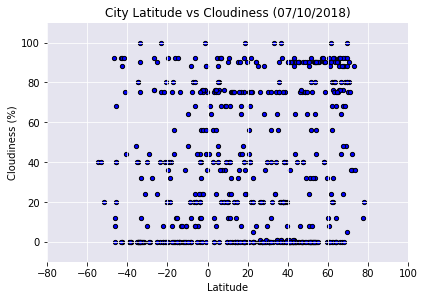

In [168]:
fig, ax = plt.subplots()
ax.scatter(city_data["Lat"], city_data["Cloudyness"], c="b", edgecolors="k", s = 18)

ax.set_title(f"City Latitude vs Cloudiness ({report_date})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")

ax.set_xlim(left=-80, right=100)
ax.set_ylim(bottom=-10, top=110)

ax.set_facecolor('#E5E4EF')
ax.grid(color="w")
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.figure.set_size_inches(w=6.47, h=4.4)

fig.savefig('./images/LatCloudiness.png')
fig.show(warn=False)

## Latitude vs. Wind Seed Plot

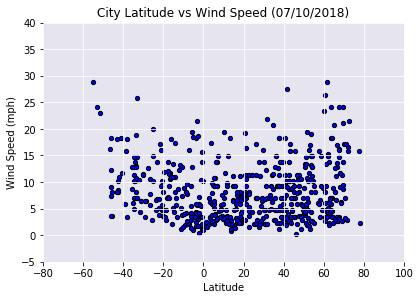

In [169]:
fig, ax = plt.subplots()
ax.scatter(city_data["Lat"], city_data["Wind Speed"], c="b", edgecolors="k", s= 18)

ax.set_title(f"City Latitude vs Wind Speed ({report_date})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")

ax.set_xlim(left=-80, right=100)
ax.set_ylim(bottom=-5, top=40)

ax.set_facecolor('#E5E4EF')
ax.grid(color="w")
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.figure.set_size_inches(w=6.47, h=4.4)

fig.savefig('./images/LatWindSpeed.png')
fig.show(warn=False)